머신 러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있습니다. 모델의 목적과 데이터의 종류에 따라 맞는 평가 방법을 사용하지 않는다면 잘못된 평가 결과에 빠질 수 있습니다. 이번 장에서는 분류 모델에 사용되는 성능 평가 지표인 정확도(Accuracy), 오차행렬(Confusion Matrix), 정밀도(Precision), 재현율(Recall), F1 스코어, ROC AUC 에 대해 설명합니다.

## 1. 정확도 (Accuracy)

정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표입니다.
$$ 정확도(Accuracy) = \frac{예측\;결과가\;동일한\;데이터\;건수}{ 전체\;예측\;데이터\;건수 } $$

정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표입니다. 하지만 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우 적합한 평가 지표가 아닙니다. 예를 들어 100 개의 데이터가 있고 이중 90개의 데이터 레이블이 0, 단 10 개의 레이블이 1이라 한다면 무조건 0으로 예측 결과를 반환하는 ML모델의 경우라도 정확도가 90%가 됩니다.

0-9까지의 숫자 이미지의 픽셀 정보 데이터 세트인 `MNIST` 데이터 세트를 이용해 실습을 해보겠습니다. `MNIST` 데이터 세트 중 레이블 값이 7 인 것만 True, 나머지를 False 로 변환해 전체 데이터의 10%만 True, 90는 False 인 불균형한 데이터 세트로 변환해 본 뒤, 모든 데이터에 대해 0을 결과값으로 반환하는 `MyFakeClassifier`를 이용해 에측과 평가를 수행해 보겠습니다.

In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, X ,y):
        pass
    
    #입력 값으로 들어오는 X 데이터 세트의 크기 만큼 모두 0 값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

# MNIST 데이터 세트를 불러와서 타깃 레이블이 7 인 경우 1, 아니라면 0으로 변환
digits= load_digits()
y= (digits.target==7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# 헉숩 / 예측 / 정확도 평가
fakeclf= MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred=fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test,fakepred)))

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


모든 값을 0 으로 예측하여도 90%의 정확도가 나오는 것을 확인할 수 있습니다. 이렇게 정확도 평가 지표를 불균형한 레이블 데이터 세트에서 사용했을 때의 문제점을 해결하기 위해 여러 분류 지표를 함께 사용하여야 합니다,

## 2. 오차 행렬

이진 분류에서 성능 지표로 활용되는 오차 행렬 (confusion matrix, 혼동 행렬)은 학습된 분류 모델의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다. 오차 행렬은 4분면 행렬에서 실제 레이블 클래스 값과 예측 레이블 클래스 값이 어떠한 유형을 가지고 매핑되는지를 나타냅니다. 4분면의 왼쪽, 오른쪽을 예측된 클래스 값 기준으로 Negative 와 Positive 로 분류하고, 4분면의 위, 아래를실제 클래스 값 기준으로 Negative 와 Positive로 분류하면 예측 클래스와 실제 클래스의 값 유형에 따라 결정되는 TN, FP, FN, TP 형태로 오차 행렬의 4분면을 채울 수 있습니다. 

> TN는 예측 값을 Negative 값 0 으로 에측했고 실제 값 역시 Negative 값 0

> FP는 예측 값을 Positive 값 1 으로 에측했고 실제 값 역시 Negative 값 0

> FN는 예측 값을 Negative 값 0 으로 에측했고 실제 값 역시 Positive 값 1

> TP는 예측 값을 Positive 값 1 으로 에측했고 실제 값 역시 Positive 값 1

사이킷런은 오차 행렬을 구하기 위해 confusion_matrix() API를 제공합니다. 앞서 정확도 에서 사용한 예제를 그대로 활용하여 오차 행렬을 출력해 보겠습니다.

In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

출력 결과 TN, FP, FN, TP의 개수를 각각 확인할 수 있습니다. 이 값들을 조합하면 여러 성능 측정 지표인 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 값을 알 수 있습니다.
예를 들어, 정확도는 다음과 같이 계산이 가능합니다.

$$ 정확도(Accuracy) = \frac{예측\;결과가\;동일한\;데이터\;건수}{ 전체\;예측\;데이터\;건수 } = \frac{TN + TP}{ TN + FP + FN + TP }$$ 

## 3. 정밀도와 재현율

정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표입니다. 각각 다음과 같은 공식으로 계산됩니다.

$$ 정밀도(Precision) = \frac{예측과\;실제\;값이\;모두\;Positive인\;데이터\;건수}{ 예측을\; Positive로\;한\;데이터\;건수 } = \frac{TP}{ FP + TP }$$ 
$$ 재현율(Recall) = \frac{예측과\;실제\;값이\;모두\;Positive인\;데이터\;건수}{ 실제\; 값이\; Positive인\;데이터\;건수 } = \frac{TP}{ FN + TP }$$ 

정밀도와 재련율 지표는 분류 모델의 목적에 따라 특정 평가 지표가 더 중요한 지표로 간주될 수 있습니다. 실제 Positive인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우에는 재현율이 상대적으로 더 중요한 지표입니다. 한편 실제 Negative인 데이터 예측을 Positive로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우에는 정밀도가 상대적으로 더 중요한 지표입니다. 재현율과 정밀도 모두 TP를 높이는 데 동일하게 초점을 맞추지만, 재현율은 FN을 낮추는 데, 정밀도는 FP를 낮추는 데 초점을 맞추기 때문입니다.

일반적인 경우 두 지표는 서로 보완적인 지표로 분류의 성능을 평가하는 데 적용되며, 어느 한쪽만 높은 수치를 얻기보다는 둘 모두 높은 수치를 얻는 것이 좋은 평가입니다. 

사이킷 런의 `precision_score()` 를 사용하여 정밀도를 ,`recall_score()`를 사용하여 재현율을 계산할 수 있습니다. 타이타닉 예제에 오차 행렬 및 정밀도, 재현율을 모두 구해 예측 성능을 평가해 보겠습니다.

[데이터셋 출처](https://www.kaggle.com/c/titanic/data)

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#오차 행렬, 정확도, 정밀도, 재현율을 모두 구하는 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [8]:
from sklearn import preprocessing

#앞 단원에서 사용한 데이터 전처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin' , 'Sex' , 'Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#원본 데이터 재로딩, 가공, 학습/테스트 데이터 분할
titanic_df = pd.read_csv('./train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)
X_titanic_df=transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,test_size=0.20, random_state=11)
lr_clf=LogisticRegression()

#학습 및 예측
lr_clf.fit(X_train,y_train)
pred=lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.849162, 정밀도: 0.7742, 재현율: 0.7869


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


오차 행렬과 정확도, 정밀도, 재현율 값을 확인할 수 있습니다. 재현율이 정밀도보다 높게 나왔습니다. 만약 정밀도를 좀 더 강화하고 싶다면, 어떻게 해야 할까요?

### 3.1. 정밀도 - 재현율 트레이드오프

분류의 결정 임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있습니다. 다만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽습니다. 이러한 현상을 정밀도/재현율의 트레이드오프(Trade-off)라고 부릅니다.

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블에 속하는지를 계산하기 위해 먼저 개별 레이블별 결정 확률을 구하고, 예측 확률이 큰 레이블 값으로 예측합니다. `predict_proba()`매서드를 사용하면 개별 클래스 예측 확률을 확인할 수 있습니다. 타이타닉 생존자 예제에 적용해봅시다.

In [10]:
import numpy as np
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)

print('pred_proba() 결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:',pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])  

pred_proba() 결과 Shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.46204294 0.53795706]
 [0.8786779  0.1213221 ]
 [0.8771596  0.1228404 ]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.46204294 0.53795706 1.        ]
 [0.8786779  0.1213221  0.        ]
 [0.8771596  0.1228404  0.        ]]


`predict()` 매서드는 `pred_proba()`의 결과 개별 클래스 예측 확률 중 큰 값을 클래스 값으로 예측한다는 것을 확인할 수 있습니다. 일반적으로, 이진 분류에서는 임계값 0.5를 기준으로 이 기준 값보다 확률이 크면 Positive, 작다면 Negative로 분류합니다.

정밀도/재현율의 트레이드오프를 위해서는 이 임계값을 조정하면 됩니다. 분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 됩니다. 만약 임계값을 낮춘다면, Positive 예측의 기준이 되는 확률이 낮아지므로 True 값이 많아지게 됩니다. 따라서 FN 값이 작아지고, 재현율이 커집니다. 한편 FP의 값은 커지고, 정밀도는 감소하게 됩니다. 따라서, 임계값을 조절해 가며 정확도, 정밀도, 재현율의 변화를 살펴보며 적정 임계값을 찾아주어야 합니다. 이는 사이킷런의 `precision_recall_curve()`매서드를 사용하면 됩니다. 파라미터로 실제 클래스값 배열과 Positive 칼럼의 예측 확률 배열을 사용하면, 각 임계값별 정밀도와 재현율 값을 배열의 형태로 반환합니다. 타이타닉 생존자 예제에 적용해봅시다. 반환되는 임계값이 너무 작은 값 단위로 구성되어 있으니, 샘플로 10값만 15 Step으로 추출해 좀 더 큰 값의 임계값과 그때의 정밀도와 재현율 값을 살펴보겠습니다.

In [11]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1=lr_clf.predict_proba(X_test)[:, 1]

#실제 값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve의 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

#샘플로 10 건만 15 Step으로 추출
thr_index= np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index],2))

#15 Step 단위로 추출된 임계값에 따른 정밀도와 재현율
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값:  [0.1  0.12 0.14 0.19 0.28 0.4  0.56 0.67 0.82 0.95]
샘플 임계값별 정밀도:  [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율:  [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


결과를 시각화하면 다음과 같습니다.

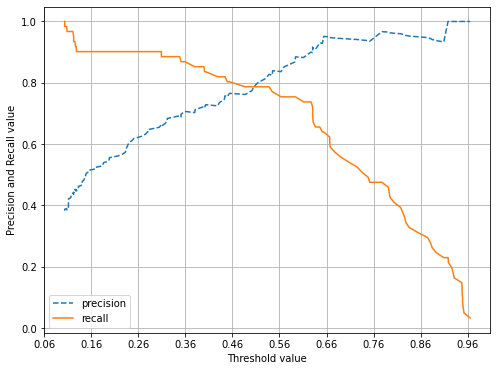

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    #Threshold와 그에 따른 정밀도와 재현율을 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 threshold값으로, Y축을 재현율과 정밀도 값으로 그리고 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    #X축 Scale은 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # 축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])

임계값이 증가할수록 재현율은 낮아지고, 정밀도는 증가하는 양상을 확인할 수 있습니다.

### 3.2. 정밀도와 재현율의 맹점

임계값의 변경은 업무 환경에 맞게 두 수치를 상호 보완할 수 있는 수준에서 적용돼어야 합니다. 단순히 하나의 성능 지표를 극단적으로 높이기 위해서 사용되서는 안됩니다. 예를 들어, 확실한 기준이 되는 경우만 Positive로, 나머지는 모두 Negative로 예측하면 FP가 0이 되어 정밀도가 100%가 되도록 할 수 있습니다. 또, 모든 환자를 Positive로 에측하면 FN이 0이 되어 재현율을 100%가 되도록 할 수 있습니다. 이처럼 정밀도와 재현율 중 어느 한쪽만 참고한다면 극단적 수치 조작이 가능하므로, 둘 중 하나만 강조하는 상황이 돼서는 안됩니다.

## 4. F1 스코어

F1 스코어는 정밀도와 재현율을 결합한 지표로,두 값이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 높은 값을 나타냅니다.

$$ F1 = \frac{2}{ \frac{1}{recall} + \frac{1}{precision} } = 2 * \frac{precision * recall}{precision + recall}$$ 

사이킷런의 `f1_score()` API를 사용하면 F1 스코어를 구할 수 있습니다.타이타닉 생존자 예측에 입계값을 변화시키면서 F1 스코어를 포함한 평가 지표를 구해 보겠습니다.

In [13]:
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)
    


def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    
    f1= f1_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}\n'.format(accuracy, precision, recall, f1))
    
thresholds=[0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba= lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임계값: 0.4
오차 행렬
[[98 20]
 [10 51]]
정확도: 0.8324, 정밀도: 0.7183, 재현율: 0.8361, F1:0.7727

임계값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033, F1:0.7840

임계값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1:0.7805

임계값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541, F1:0.7931

임계값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377, F1:0.8036



## 5. ROC 곡선과 AUC

ROC 곡선 (Receiver Operation Characteristic Curve)은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)가 어떻게 변하는지를 나타내는 곡선으로, FPR을 X축, TPR을 Y축으로 하여 그린 곡선입니다. 변수들은 다음과 같습니다.

> TPR = TP /(FN + TP) = 재현율 = 민감도

> TNR = TN / (FP + TN) = 특이성

> FPR = FP / (FP + TN) = 1 -TNR

ROC 곡선은 랜덤 수준의 이진 분류 직선 (FPR = TPR 인 직선) 으로부터 멀어질 수록 예측 성능이 더 뛰어난 모델이라고 해석할 수 있습니다.

ROC 곡선을 그리기 위해서는 임계값을 1부터 0 까지 변화시키면서 FPR을 구하고, 이 FPR값의 변화에 따른 TPR값을 구합니다. 사이킷런의 `roc_curve()` API를 이용하면 됩니다. 파라미터로 실제 클래스 값과 positive 칼럼의 예측 확률을 제공하면, FPR, TPR, 임곗값을 반환값으로 받습니다. 타이타닉 예제에 대해 ROC 곡선을 그려 보겠습니다.

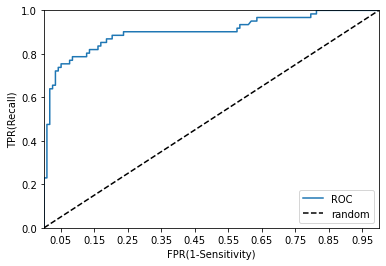

In [14]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test, pred_proba_c1):
    #임계값에 따른 FPR, TPR을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    #가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1], 'k--', label='random')
    
    # X축의 Scale을 0.1 단위로, 축 이름과 legend 표시
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

ROC 곡선 자체는 FPR과 TPR의 값 변화를 보는 데 이용되며, 분류의 성능 지표로는 ROC곡선 밑의 면적을 구한 AUC를 주로 사용합니다. 일반적으로 1에 가까울수록 좋은 수치입니다. ROC 곡선의 특성상, 보통의 분류에서 0.5 이상의 값을 가집니다. `roc_auc_score()` API를 통해 쉽게 값을 구할 수 있습니다. 타이타닉 예제에 적용하여 ROC AUC 값을 구해 보겠습니다.

In [15]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score=roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9024


## 5. 피마 인디언 당뇨병 예측

피마 인디언 당뇨병 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립하고 평가 지표를 적용해 보겠습니다.

[데이터셋 출처](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

필요한 모듈들을 임포트하고, 데이터를 `DataFrame`으로 로딩해 데이터를 개략적으로 살펴보겠습니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data= pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


데이터는 8개의 피처로 구성되어 있으며, 클래스 결정 값 중 0이 상대적으로 1 보다 많습니다.

In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


피처는 모두 숫자 형으로, 별도 피처 인코딩은 필요하지 않아 보입니다. 

로지스틱 회귀를 이용해 예측 모델을 생성하고, 성능 지표를 출력하고 재현율 곡선을 시각화해 보겠습니다.

In [3]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [4]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [7]:
#피처 데이터 세트 X, 레이블 데이터 세트 y를 추출
X= diabetes_data.iloc[:, :-1]
y= diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

#로지스틱 회귀로 학습, 예측 및 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,    F1: 0.6392, AUC:0.7919


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


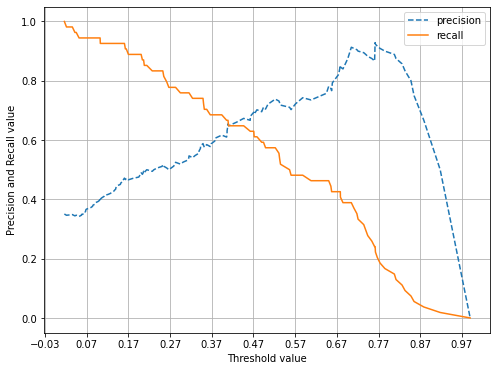

In [8]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)


임계값을 0.42 정도로 낮추어 정밀도와 재현율이 균형을 맞추도록 할 수 있습니다. 다만, 두 지표 모두 0.7이 안 되는 수치로 낮아 보입니다. 이를 개선하기 위해 데이터 전처리가 필요해 보입니다. 원본 데이터의 값의 분포도를 살펴보겠습니다.

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


최소값이 0으로, 잘못된 값이 입력된 칼럼이 상당히 많다는 것을 할 수 있습니다. 이중 임신 회수를 나타내는 `Pregnancies()`를 제외한 값들을 각 칼럼의 평균값으로 대체하겠습니다.

In [11]:
zero_features=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features]=diabetes_data[zero_features].replace(0, mean_zero_features)


새로운 데이터 세트에 대해 피처 스케일링을 적용해 준 후 다시 학습/테스트 데이터 세트로 나누고 로지스틱 회귀를 적용해 성능 평가 지표를 확인해 보겠습니다.

In [12]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행.
lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
pred= lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [20 34]]
정확도: 0.8052, 정밀도: 0.7727, 재현율: 0.6296,    F1: 0.6939, AUC:0.8430


/opt/homebrew/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


성능 수치가 일정 수준 개선된 것을 확인할 수 있습니다. 하지만 여전히 재현율 수치의 개선이 필요해 보입니다. 이를 위해 최적의 임계값을 찾아 보겠습니다.

In [13]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [14]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[68 32]
 [11 43]]
정확도: 0.7208, 정밀도: 0.5733, 재현율: 0.7963,    F1: 0.6667, AUC:0.8430
임곗값: 0.33
오차 행렬
[[73 27]
 [11 43]]
정확도: 0.7532, 정밀도: 0.6143, 재현율: 0.7963,    F1: 0.6935, AUC:0.8430
임곗값: 0.36
오차 행렬
[[75 25]
 [14 40]]
정확도: 0.7468, 정밀도: 0.6154, 재현율: 0.7407,    F1: 0.6723, AUC:0.8430
임곗값: 0.39
오차 행렬
[[77 23]
 [15 39]]
정확도: 0.7532, 정밀도: 0.6290, 재현율: 0.7222,    F1: 0.6724, AUC:0.8430
임곗값: 0.42
오차 행렬
[[81 19]
 [16 38]]
정확도: 0.7727, 정밀도: 0.6667, 재현율: 0.7037,    F1: 0.6847, AUC:0.8430
임곗값: 0.45
오차 행렬
[[83 17]
 [19 35]]
정확도: 0.7662, 정밀도: 0.6731, 재현율: 0.6481,    F1: 0.6604, AUC:0.8430
임곗값: 0.48
오차 행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율: 0.6481,    F1: 0.7000, AUC:0.8430
임곗값: 0.5
오차 행렬
[[90 10]
 [20 34]]
정확도: 0.8052, 정밀도: 0.7727, 재현율: 0.6296,    F1: 0.6939, AUC:0.8430


결과를 살펴봤을 때 최적의 임계값은 0.48로 보입니다. 이를 이용해 새롭계 예측을 진행해 보겠습니다.

In [15]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율: 0.6481,    F1: 0.7000, AUC:0.8430


이번 단원을 통해 분류에 사용되는 여러 성능 지표와 그 의미, 주의사항들을 살펴 보았습니다.